In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve

## Loading the data set

In [4]:

data = pd.read_csv("Healthcare-Diabetes.csv")

In [5]:
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
2763,2764,2,75,64,24,55,29.7,0.370,33,0
2764,2765,8,179,72,42,130,32.7,0.719,36,1
2765,2766,6,85,78,0,0,31.2,0.382,42,0
2766,2767,0,129,110,46,130,67.1,0.319,26,1


## Data Understanding and EDA 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [7]:
data.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
data = data.drop(columns=["Id"])


In [10]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33,0
2764,8,179,72,42,130,32.7,0.719,36,1
2765,6,85,78,0,0,31.2,0.382,42,0
2766,0,129,110,46,130,67.1,0.319,26,1


In [11]:
#correlation between columns
correlation = data.corr()
print(correlation)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.122839       0.147253      -0.068673   
Glucose                      0.122839  1.000000       0.142095       0.061023   
BloodPressure                0.147253  0.142095       1.000000       0.201167   
SkinThickness               -0.068673  0.061023       0.201167       1.000000   
Insulin                     -0.075734  0.323445       0.087823       0.445345   
BMI                          0.018761  0.225308       0.281560       0.393494   
DiabetesPedigreeFunction    -0.027731  0.127195       0.048471       0.179830   
Age                          0.540805  0.256958       0.238684      -0.111895   
Outcome                      0.223796  0.460644       0.072900       0.075603   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.075734  0.018761                 -0.027731   
Glucose                   0.323445  0.225

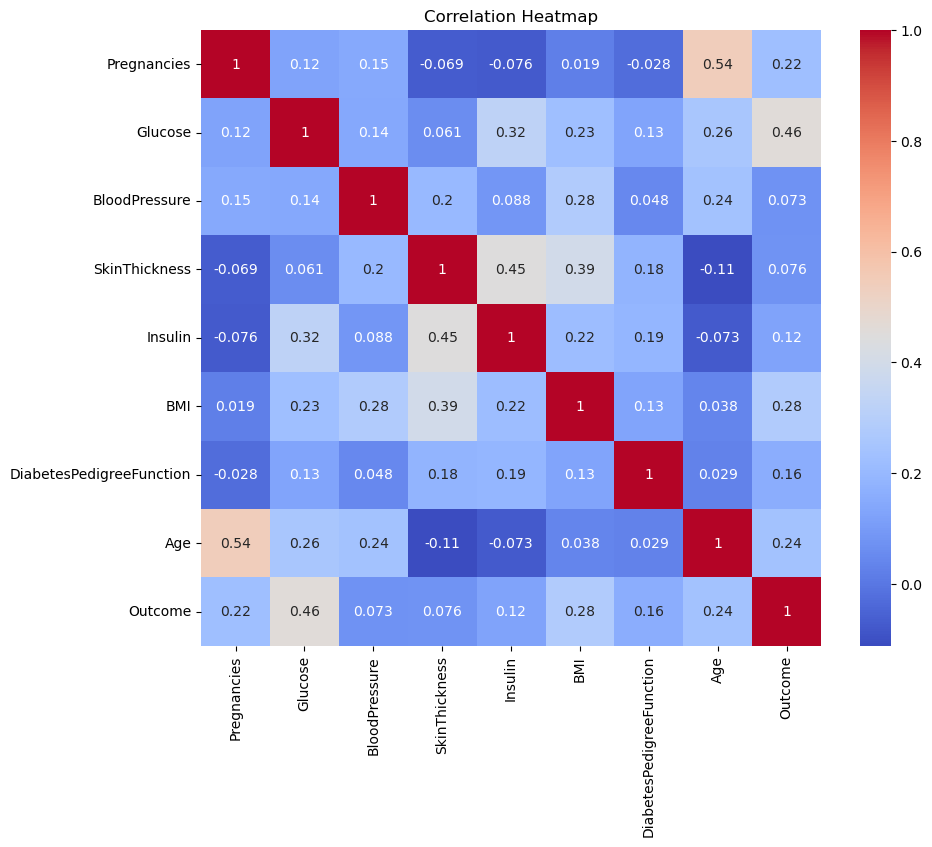

In [18]:
#To view easily took it from heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


## Class Distribution Check

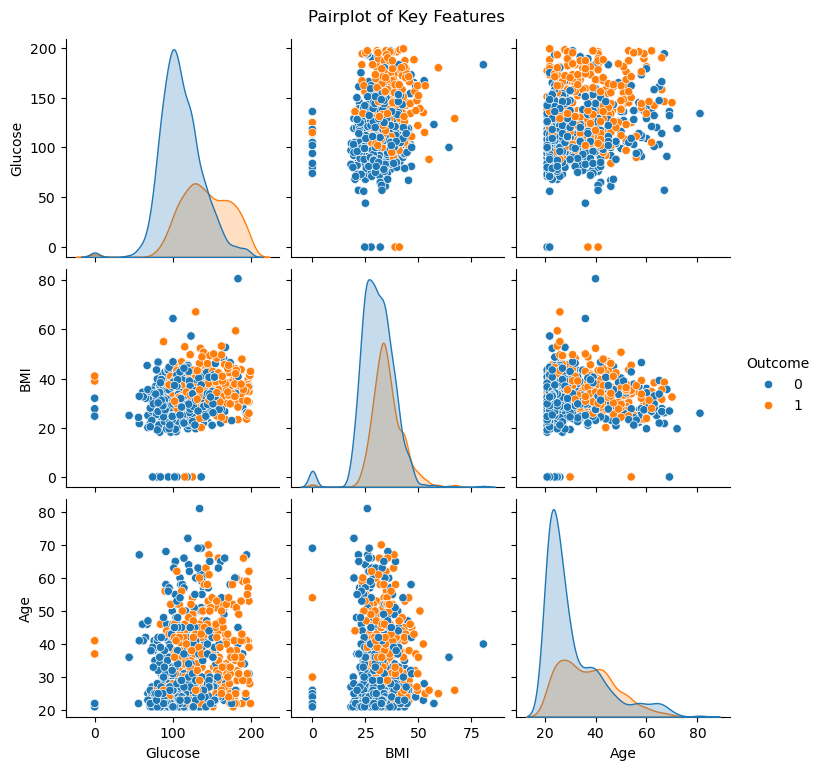

In [19]:
# 2. Pairplot for important features
sns.pairplot(data[['Glucose', 'BMI', 'Age', 'Outcome']], hue='Outcome')
plt.suptitle('Pairplot of Key Features', y=1.02)
plt.show()


## Boxplots to see distribution by Outcome

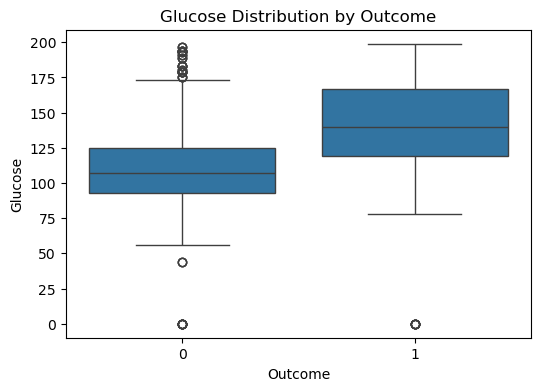

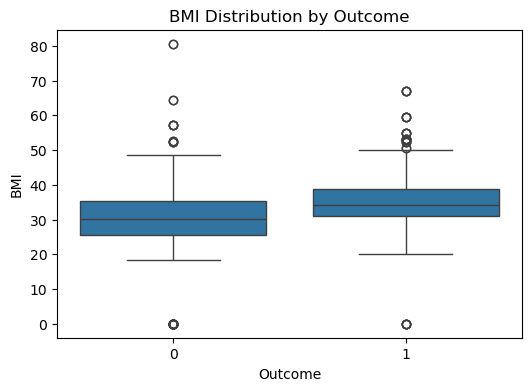

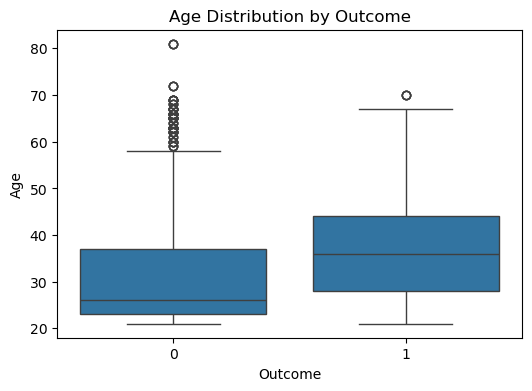

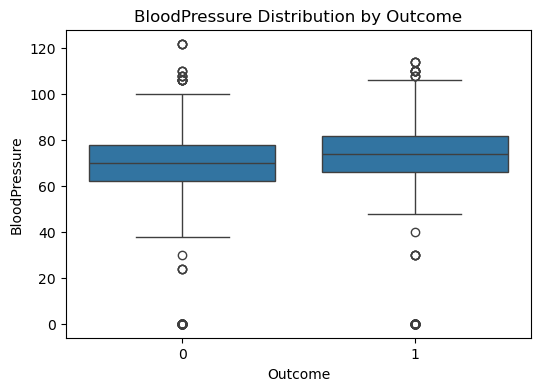

In [20]:
features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f"{feature} Distribution by Outcome")
    plt.show()



# Data Preprocessing


In [13]:
#Split into Features and Target
#X will store all columns except outcome col
#Y will store the outcome col
X = data.drop("Outcome", axis = 1)
Y = data['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2763,2,75,64,24,55,29.7,0.370,33
2764,8,179,72,42,130,32.7,0.719,36
2765,6,85,78,0,0,31.2,0.382,42
2766,0,129,110,46,130,67.1,0.319,26


In [21]:
#Train-Test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
2461,1,124,60,32,0,35.8,0.514,21
149,2,90,70,17,0,27.3,0.085,22
385,1,119,54,13,50,22.3,0.205,24
2438,4,144,82,32,0,38.5,0.554,37
2592,0,126,86,27,120,27.4,0.515,21
...,...,...,...,...,...,...,...,...
1623,1,119,54,13,50,22.3,0.205,24
1947,1,149,68,29,127,29.3,0.349,42
534,1,77,56,30,56,33.3,1.251,24
794,2,84,50,23,76,30.4,0.968,21


In [22]:
#Train the Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
#Predict the Test Set
Y_pred = model.predict(X_test)


In [24]:
print("Accuracy:", accuracy_score(Y_test, Y_pred))
print("Classification Report: ", classification_report(Y_test, Y_pred))

Accuracy: 0.9963898916967509
Classification Report:                precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554



In [25]:
#Making Predictions
predictions = model.predict(X_test)
predictions

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,

In [26]:
#Evaluation
accuracy = accuracy_score(predictions,Y_test)
accuracy

0.9963898916967509

In [28]:
#Confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

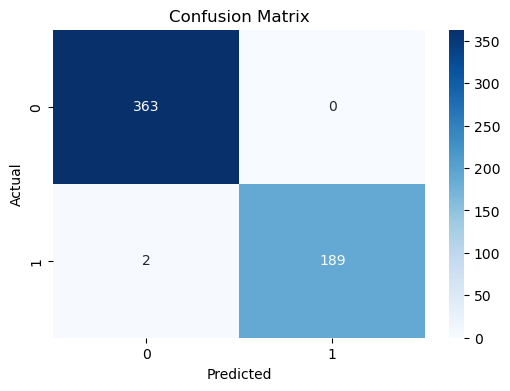

In [29]:
# Visualize Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
# Predict class probabilities (needed for ROC, AUC, Precision-Recall Curve)
Y_proba = model.predict_proba(X_test)[:, 1]  # Probability of class 1

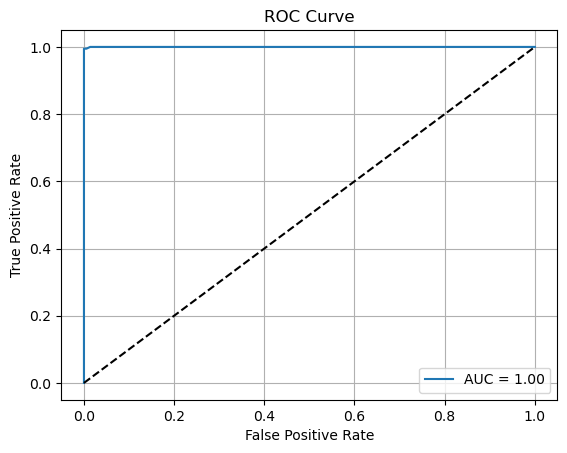

In [34]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(Y_test, Y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [35]:
#  Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_proba)

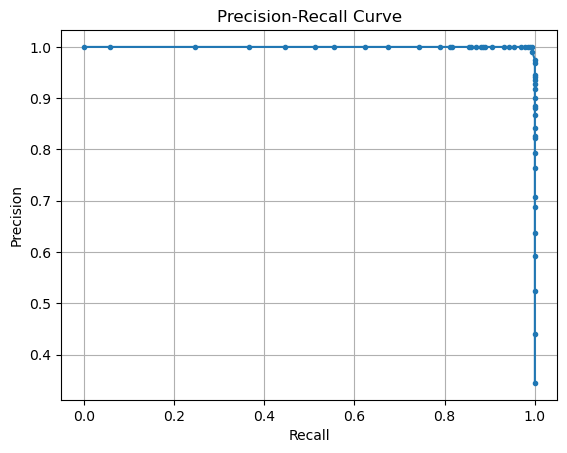

In [36]:
plt.figure()
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

In [42]:
#Feature Importance from Random Forest
importances = model.feature_importances_
feat_names = X.columns
importance_df = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
print(importance_df.sort_values(by='Importance', ascending=False))


                    Feature  Importance
1                   Glucose    0.260783
5                       BMI    0.169807
7                       Age    0.131520
6  DiabetesPedigreeFunction    0.123333
2             BloodPressure    0.088238
0               Pregnancies    0.081259
4                   Insulin    0.077146
3             SkinThickness    0.067913


In [43]:
#Cross-Validation with AUC Score

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, Y, cv=5, scoring='roc_auc')
print("Cross-validated AUC scores:", scores)
print("Mean AUC:", scores.mean())


Cross-validated AUC scores: [0.99866586 1.         1.         1.         0.99918805]
Mean AUC: 0.999570782349409
